# Módulo 3
**Desarrollo de proyectos de análisis de datos  IN1002B**

### Regresión lineal

Describir base de datos:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# cargar datos


In [5]:
# head()


,Year,P_Football_Performance,SMAn2,N_Applications
0,2006,0.273,5778.0,5778
1,2007,0.273,5778.0,5140
2,2008,0.250,5459.0,6141
3,2009,0.615,5640.5,7429
4,2010,0.333,6785.0,7839
5,2011,0.417,7634.0,9300
6,2012,0.692,8569.5,9864
7,2013,0.538,9582.0,10449
8,2014,0.615,10156.5,11117
9,2015,0.538,10783.0,10766


Lo que deseamos saber es cuantas aplicaciones tendrá la universidad el siguiente periodo.

Una forma de explorar datos tipo cuantitativos de forma rápida y visual es con la función de ```pairplot()```. Lo que crea es un cuadrante donde los gráficos de las diagonales representan un tipo de gráfico y el resto muestra relaciones entre X y Y variables. [Referencia](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Pueden jugar con los tipos de gráficos que desean mostrar con los parámetros de ```kind``` y ```diag_kind```.

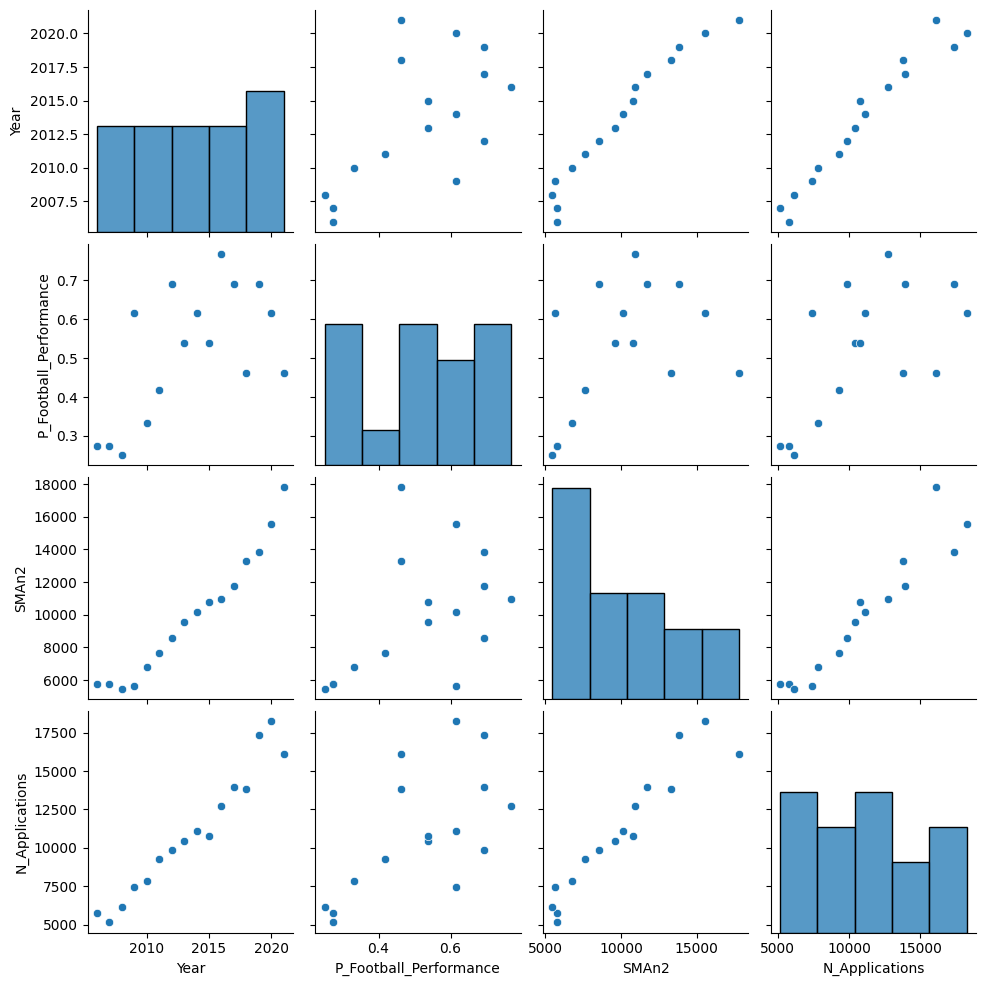

In [6]:
sns.pairplot()

Con lo que nos proporciona el gráfico anterior:

-  **¿Pueden ver alguna variable que tenga una fuerte correlación con otra?**

- **¿Que es correlación?**


Si lo anterior no es suficiente, podemos apoyarnos de un mapa de correlación. Lo podemos conseguir uniendo las funciones ```corr()``` y ```heatmap()```:

In [ ]:
correlation_matrix = data.corr()

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,  linewidths=0.5)

# Ajustar el título
plt.title('Matriz de Correlación')
plt.show()

**¿Cuál es la variable que tiene una mayor correlación (positiva o negativa) con el número de aplicaciones**


Esa variable será nuestra variable X dentro de la ecuación de regresión lineal:

## **Regresión lineal:**

El análisis de regresión es una técnica estadística que permite comprobar la hipótesis de que una variable depende de otra u otras variables.


$y = \beta_0 + \beta_1 x + \beta_2 x +  \beta_n x +\epsilon$

<
β0 y β1 son los parámetros del modelo. ε es una variable aleatoria, llamada error,
que explica la variabilidad en y que no se puede explicar con la relación lineal
entre x y y.

Cuando nuestra ecuación luce así:

$y = \beta_0 + \beta_1 x +\epsilon$

Estamos hablando de que nuestro modelo es una regresión lineal **simple**

### Modelo 1

In [16]:
# definir X y Y con la variable que seleccionaron
X = data['SMAn2'].values.reshape(-1, 1)
y = data['N_Applications'].values.reshape(-1, 1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42 )

In [ ]:
# Splitting the data into training and testing data
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

In [ ]:
# Hacer predicciones
y_pred = regr.predict(X_test)

# Graficar los datos y la recta de regresión
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.scatter(X_test, y_pred, color='red', label='Predicciones', alpha=0.5)

# Graficar la línea de regresión
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = regr.predict(X_line)
plt.plot(X_line, y_line, color='green', label='Recta de regresión')

plt.xlabel('P_Football_Performance')
plt.ylabel('N_Applications')
plt.title('Regresión Lineal')
plt.legend()
plt.show()

### Modelo 2

Solo para comparar, en X coloca la variable que tenía menor correlación:


In [ ]:
# definir X y Y
X = data['P_Football_Performance'].values.reshape(-1, 1)
y = data['N_Applications'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42 )

regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

In [ ]:
# Hacer predicciones
y_pred = regr.predict(X_test)

# Graficar los datos y la recta de regresión
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.scatter(X_test, y_pred, color='red', label='Predicciones', alpha=0.5)

# Graficar la línea de regresión
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = regr.predict(X_line)
plt.plot(X_line, y_line, color='green', label='Recta de regresión')

plt.xlabel('P_Football_Performance')
plt.ylabel('N_Applications')
plt.title('Regresión Lineal')
plt.legend()
plt.show()

### Modelo 3

Ahora coloca todas las variables en X

In [ ]:
# definir X y Y

X = data.drop(columns = 'N_Applications')
y = data['N_Applications'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42 )

regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))